In [14]:
import pandas as pd
import os # operation system - модуль для работы с файлами

# Домашнее задание

In [2]:
# 1. В списке numbers содержатся числа. 
# Добавьте через цикл в список positive_numbers положительные числа из numbers. 
# Если вам попался 0, то нужно прекратить этот цикл.
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    elif i > 0:
        positive_numbers.append(i)
positive_numbers

[1, 3]

In [20]:
# 2. приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 
# Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .
taxi = pd.read_csv("..\\3 Продвинутый Pandas. Визуализация\\data\\3_taxi_peru.csv", sep = ';')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [22]:
taxi.start_at = pd.to_datetime(taxi.start_at)
taxi.arrived_at = pd.to_datetime(taxi.arrived_at)
taxi.end_at = pd.to_datetime(taxi.end_at)
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [24]:
taxi = taxi[(taxi.start_type == 'asap') | (taxi.start_type == 'reserved')]
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [26]:
# 3. Создайте колонку wait_time, в которой будет храниться разница 
# между временем подачи машины (arrived_at) 
# и временем заказа (start_at) в минутах.
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).dt.total_seconds() / 60

In [28]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
dtype: object

In [30]:
# 4. Посмотрим, какие водители опаздывали на заказы к определенному времени 
# (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
# Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, 
# который опоздал на заказ интересующего нас типа наибольшее число раз

taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0)] \
    .groupby('driver_id') \
    .driver_id.value_counts() \
    .sort_values(ascending = False)

driver_id
406921adcca37705ef527b4246c0cfea    67
d665fb9f75ef5d9cd0fd89479380ba78    59
ec84a73745199ff840ecafcb924383ad    57
56f59b58bcbbd1cdabc3652e713134c2    51
c814db2127582cf95dea1f74f43127c2    45
                                    ..
d7bf644eb441cda6127f91addebb85c4     1
b68895736389f2949faa8c73555b81ac     1
8cb98e46b27af1e6fca8768a2a6329f3     1
389bfa333ba8fa7281dd5f0e1b57c0c1     1
358741ec2409c505c4545c38669b000b     1
Name: count, Length: 105, dtype: int64

In [32]:
#  5. Добавьте столбец month, где будет храниться номер месяца, 
# в котором был сделан заказ (start_at),  и столбец weekday – название дня недели. 
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.day_name()

In [34]:
taxi.month

0        11
1         6
2         5
3         6
4         9
         ..
23106     7
23107    10
23108     9
23109     4
23110     3
Name: month, Length: 23091, dtype: int32

In [36]:
taxi.weekday

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23091, dtype: object

<Axes: xlabel='month', ylabel='count'>

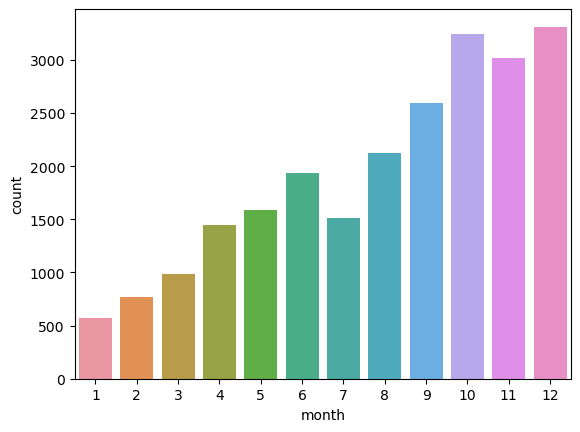

In [38]:
# 6. Постройте график числа заказов по месяцам (month). 
# Подумайте, с чем может быть связана полученная картина. 
import seaborn as sns
sns.countplot(x = taxi.month)

<Axes: xlabel='weekday', ylabel='count'>

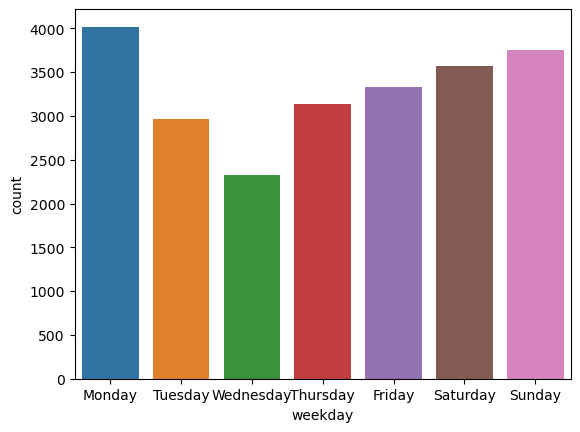

In [40]:
# 7. А теперь – график по дням недели (weekday). 
# Задать порядок столбиков на графике можно с помощью аргумента order, 
# которому нужно передать список названий в нужном порядке. Например: 
#sns.countplot(data['column'], order=['One', 'Two', 'Three'])
sns.countplot(x = taxi.weekday, order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [42]:
# 8. Также мы можем посмотреть на несколько простых метрик, 
# показывающих число уникальных пользователей за определённый период:
# •	DAU (daily active users) – число уникальных пользователей за день
# •	WAU (weekly active users) – число уникальных пользователей за неделю
# •	MAU (monthly active users) – число уникальных пользователей за месяц
DAU = taxi.groupby(taxi.start_at.dt.normalize()).user_id.nunique()
print(DAU)
print("MAX DAU AT:" ,DAU.idxmax())

start_at
2010-01-01     4
2010-01-02     6
2010-01-03     6
2010-01-04     8
2010-01-05     4
              ..
2010-12-27    51
2010-12-28    42
2010-12-29    22
2010-12-30    31
2010-12-31    20
Name: user_id, Length: 365, dtype: int64
MAX DAU AT: 2010-12-20 00:00:00


In [44]:
WAU = taxi.groupby(taxi.start_at.dt.strftime("%W")).user_id.nunique()
print(WAU.head())
print("MAX WAU AT:" ,WAU.idxmax())

start_at
00    13
01    32
02    48
03    45
04    34
Name: user_id, dtype: int64
MAX WAU AT: 51


In [46]:
MAU = taxi.groupby(taxi.start_at.dt.month).user_id.nunique()
print(MAU)

start_at
1     102
2     110
3     162
4     253
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='start_at', ylabel='user_id'>

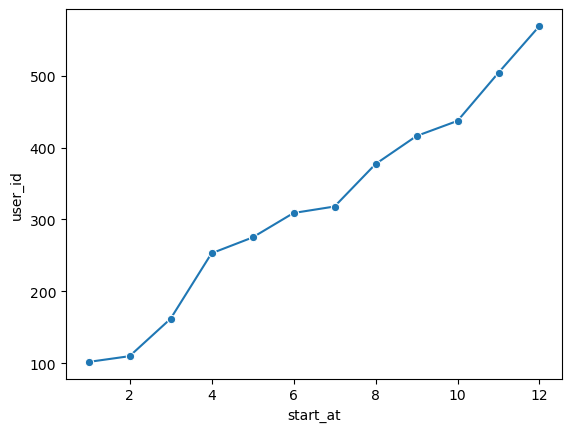

In [48]:
sns.lineplot(data = MAU, marker = 'o')